In [ ]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import SimpleRNN,LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
#X = [[[(i*j +j)/500] for i in range(5)] for j in range(100)]
#Y = [(i*6)/500 for i in range(100)]

In [ ]:
X = [[[(i*j +j)] for i in range(5)] for j in range(100)]
Y = [(i*6) for i in range(100)]

In [ ]:
  for i in range(100):
    print(X[i],Y[i])

In [ ]:
X = np.array(X, dtype="float32")
Y = np.array(Y, dtype="float32")

In [ ]:
X /= 500
Y/= 500

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,
                                                    random_state=5)

In [ ]:
X_train

In [ ]:
from keras.layers import SimpleRNN
#from keras.layers import LSTM
model = Sequential()
model.add(SimpleRNN(2,input_shape=(5,1), return_sequences=False))
#model.add(SimpleRNN(1))
#model.add(SimpleRNN(1,input_shape=(5,1), return_state=True))
#model.add(LSTM((40),input_shape=(5,1), return_sequences=True))
#model.add(LSTM((3),input_shape=(5,1), return_state=True))
#model.add(SimpleRNN(50, return_sequences=True))
#model.add(SimpleRNN(50, return_sequences=True))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam',loss='mae', metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
hist = model.fit(X_train, y_train, epochs=1000, batch_size=64,
                 validation_data=(X_test, y_test))

Epoch 1/1000
2/2 [==============================] - 2s 326ms/step - loss: 0.1723 - acc: 0.0125 - val_loss: 0.1329 - val_acc: 0.0000e+00
Epoch 2/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.1660 - acc: 0.0125 - val_loss: 0.1267 - val_acc: 0.0000e+00
Epoch 3/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.1599 - acc: 0.0125 - val_loss: 0.1204 - val_acc: 0.0000e+00
Epoch 4/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.1542 - acc: 0.0125 - val_loss: 0.1141 - val_acc: 0.0000e+00
Epoch 5/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.1485 - acc: 0.0125 - val_loss: 0.1078 - val_acc: 0.0000e+00
Epoch 6/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.1430 - acc: 0.0125 - val_loss: 0.1017 - val_acc: 0.0000e+00
Epoch 7/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.1377 - acc: 0.0125 - val_loss: 0.0961 - val_acc: 0.0000e+00
Epoch 8/1000
2/2 [==============================] - 0s

In [ ]:
y_predict = model.predict(X_test)

1/1 [==============================] - 0s 195ms/step


In [ ]:
np.round(y_predict*500)

array([[397.],
       [191.],
       [276.],
       [167.],
       [445.],
       [137.],
       [ 60.],
       [119.],
       [102.],
       [209.],
       [579.],
       [221.],
       [421.],
       [239.],
       [361.],
       [203.],
       [251.],
       [342.],
       [ 72.],
       [415.]], dtype=float32)

In [ ]:
np.round(y_test*500)

array([396., 192., 276., 168., 444., 138.,  60., 120., 102., 210., 582.,
       222., 420., 240., 360., 204., 252., 342.,  72., 414.],
      dtype=float32)

In [ ]:
#y_train

In [ ]:
#y_predict = model.predict(X_test)

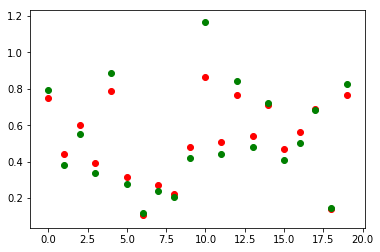

In [ ]:
plt.scatter(range(20), y_predict, c='r')
plt.scatter(range(20), y_test, c='g')
plt.show()

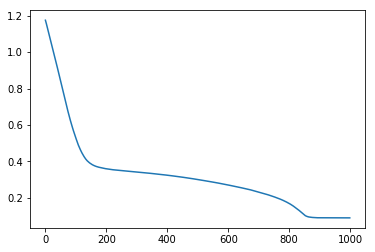

In [ ]:
plt.plot(hist.history['loss'])
plt.show()